# Regression model to predict Housing features using Deep Learning with Keras 

# Kaggle Dataset :

https://www.kaggle.com/harlfoxem/housesalesprediction

<b>Import required libraries<b/>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<b>Check for missing Data<b/>

In [4]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<b>Do distribution plot for continuous labels<b/>

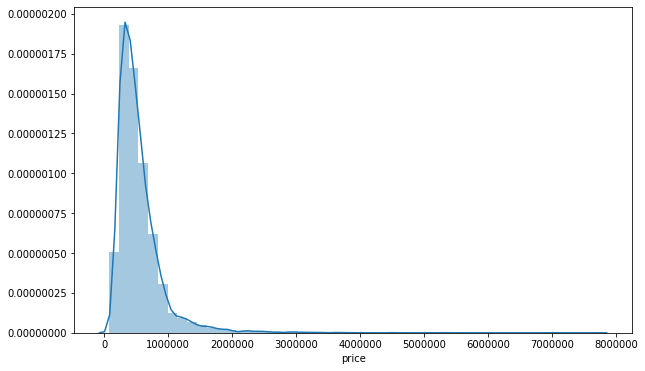

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

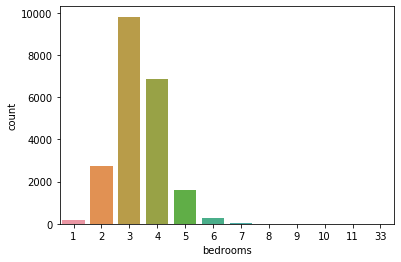

In [9]:
sns.countplot(df['bedrooms'])

In [10]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<b>Explore highly co-related features using a scatterplot<b/>

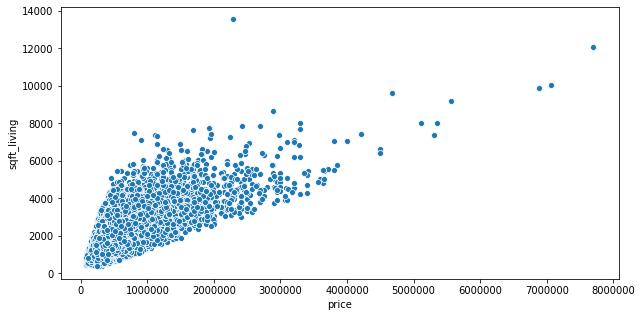

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

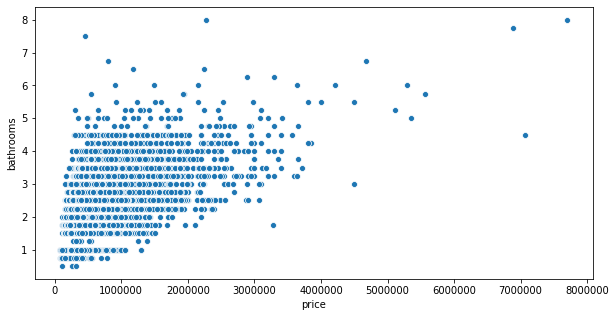

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='bathrooms', data=df)

In [14]:
#sns.boxplot(x='price', y='bedrooms', data=df)

<b>Explore pricing data distribution based on latitude & longitude<b/>

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

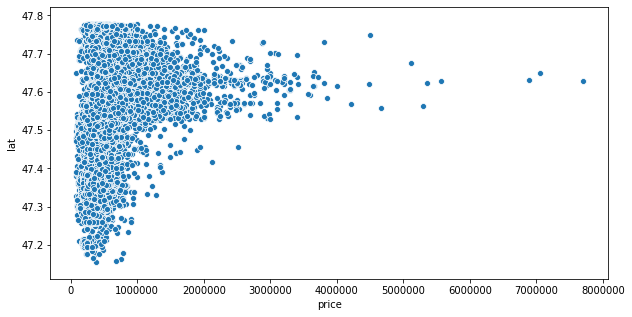

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='lat', data=df)

<b>Variation of latitude & longitude with respect to price<b/>

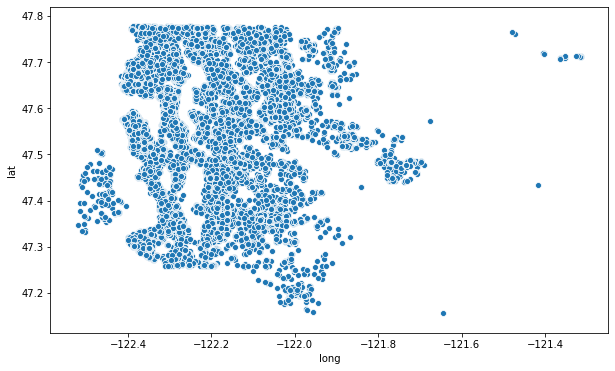

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df)

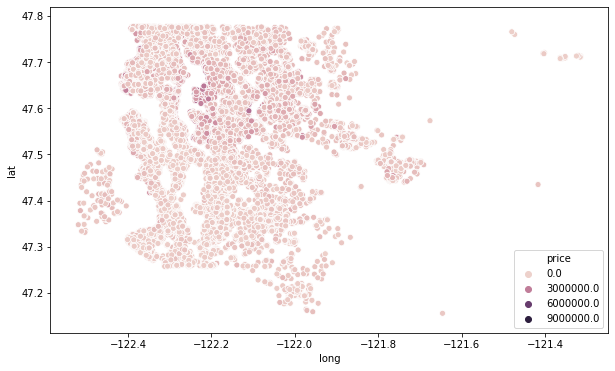

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [19]:
df.sort_values('price', ascending=False).head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [20]:
len(df)

21597

In [21]:
len(df) * 0.01

215.97

<b>Exclusing top 1% data<b/>

In [22]:
bottom99_df = df.sort_values('price', ascending=False).iloc[216:]

In [23]:
len(bottom99_df)

21381

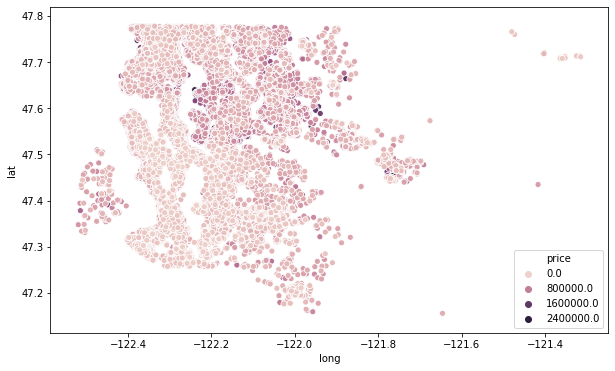

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=bottom99_df, hue='price')

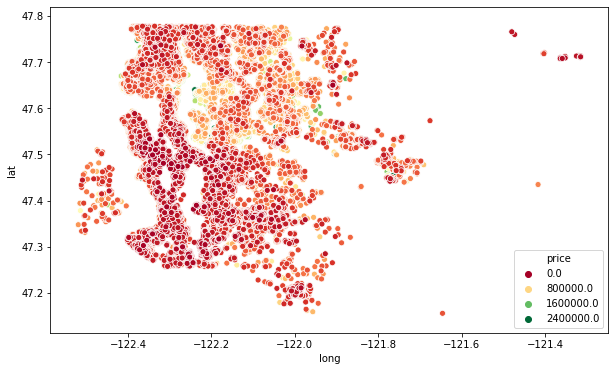

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', data=bottom99_df, hue='price', palette='RdYlGn')

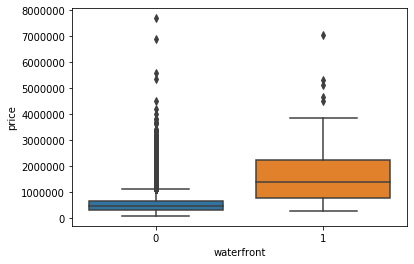

In [26]:
sns.boxplot(x='waterfront', y='price', data=df)

<b>Feature Engineering<b/>

In [27]:
df = df.drop('id', axis=1)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
df['year'] = df['date'].apply(lambda date: date.year)

In [34]:
df['month'] = df['date'].apply(lambda date: date.month)

In [35]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


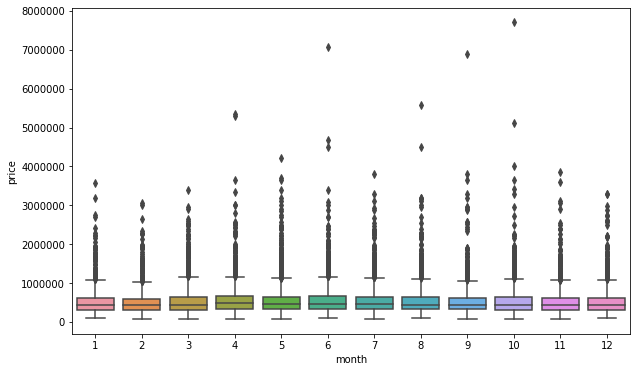

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [37]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

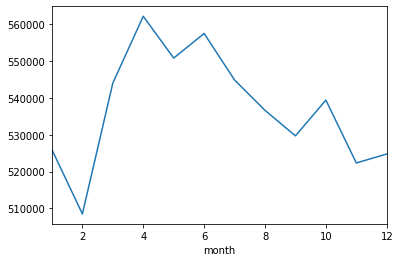

In [38]:
df.groupby('month').mean()['price'].plot()

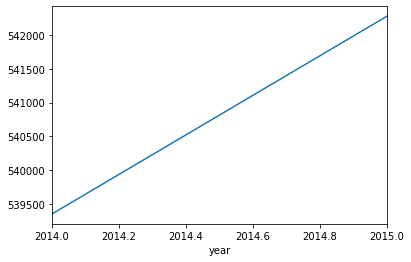

In [39]:
df.groupby('year').mean()['price'].plot()

In [40]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<b>Dropping Date & ZipCode<b/>

In [41]:
df = df.drop('date', axis=1)

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [43]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [44]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [45]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [47]:
df = df.drop('zipcode', axis=1)

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [49]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

<b>Separate features from Labels<b/>

In [50]:
X = df.drop('price', axis=1).values
y = df['price'].values

<b>Do Train Test Split<b/>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<b>Do Feature Scaling<b/>

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test) #Never fit test data bcz we don't want to assume prior info about test set

<b>Create Neural Network Model<b/>

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
X_train.shape

(15117, 19)

In [59]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [60]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), batch_size=128)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 93us/sample - loss: 430234334076.2490 - val_loss: 418889428799.8419
Epoch 2/400
15117/15117 [==============================] - 0s 25us/sample - loss: 429042610135.0861 - val_loss: 414921302400.3160
Epoch 3/400
15117/15117 [==============================] - 0s 23us/sample - loss: 413420170087.2501 - val_loss: 378906060592.6716
Epoch 4/400
15117/15117 [==============================] - 0s 24us/sample - loss: 335690521194.9927 - val_loss: 253172663000.1778
Epoch 5/400
15117/15117 [==============================] - 0s 25us/sample - loss: 181732304814.3753 - val_loss: 113054822774.2025
Epoch 6/400
15117/15117 [==============================] - 0s 23us/sample - loss: 103268973391.6772 - val_loss: 94858015235.7926
Epoch 7/400
15117/15117 [==============================] - 0s 24us/sample - loss: 97324348334.3754 - val_loss: 93312735904.5531
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 23us/sample - loss: 39038887471.8571 - val_loss: 37829441227.5358
Epoch 65/400
15117/15117 [==============================] - 0s 24us/sample - loss: 38813680589.6704 - val_loss: 37569331796.7012
Epoch 66/400
15117/15117 [==============================] - 0s 26us/sample - loss: 38594959468.4152 - val_loss: 37323762068.5432
Epoch 67/400
15117/15117 [==============================] - 0s 24us/sample - loss: 38316840109.7488 - val_loss: 37089890491.1012
Epoch 68/400
15117/15117 [==============================] - 0s 26us/sample - loss: 38086885228.8724 - val_loss: 36858026626.2123
Epoch 69/400
15117/15117 [==============================] - 0s 22us/sample - loss: 37897604519.9741 - val_loss: 36631854871.3877
Epoch 70/400
15117/15117 [==============================] - 0s 27us/sample - loss: 37677667297.5855 - val_loss: 36668120289.0272
Epoch 71/400
15117/15117 [==============================] - 0s 24us/sample - loss: 37555293224.0333 - val_loss

15117/15117 [==============================] - 0s 24us/sample - loss: 33216414394.7206 - val_loss: 31805185876.0691
Epoch 128/400
15117/15117 [==============================] - 0s 24us/sample - loss: 33239856912.5112 - val_loss: 31832706829.2741
Epoch 129/400
15117/15117 [==============================] - 0s 26us/sample - loss: 33160695757.3317 - val_loss: 31684767076.5037
Epoch 130/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33102892661.4921 - val_loss: 31760860804.7407
Epoch 131/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33057313525.2127 - val_loss: 31691209224.8494
Epoch 132/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33028850631.5740 - val_loss: 31565659158.7556
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 33024829112.8240 - val_loss: 31530942039.2296
Epoch 134/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33002511707.5991 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 31612692351.3650 - val_loss: 29821800660.3852
Epoch 191/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31618463897.6305 - val_loss: 29807159639.8617
Epoch 192/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31539036938.9905 - val_loss: 29761836039.5852
Epoch 193/400
15117/15117 [==============================] - 0s 21us/sample - loss: 31538646281.0600 - val_loss: 29759282724.6617
Epoch 194/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31506489520.1196 - val_loss: 29729090137.7580
Epoch 195/400
15117/15117 [==============================] - 0s 21us/sample - loss: 31482528709.8128 - val_loss: 29742923973.2148
Epoch 196/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31486813446.3505 - val_loss: 29701838403.0025
Epoch 197/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31452286704.2339 - v

15117/15117 [==============================] - 0s 24us/sample - loss: 30697437372.8544 - val_loss: 28746031387.1802
Epoch 254/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30688749747.7097 - val_loss: 28833421665.9753
Epoch 255/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30694011663.0548 - val_loss: 28695068338.2519
Epoch 256/400
15117/15117 [==============================] - 0s 25us/sample - loss: 30666847843.3382 - val_loss: 28753766728.6914
Epoch 257/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30667389578.8297 - val_loss: 28821084660.6222
Epoch 258/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30643096497.8977 - val_loss: 28671310127.4074
Epoch 259/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30640774797.5392 - val_loss: 28681841110.2815
Epoch 260/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30651157968.4816 - v

15117/15117 [==============================] - 0s 22us/sample - loss: 30050231511.2385 - val_loss: 27844455219.2000
Epoch 317/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30086761293.1031 - val_loss: 27828017895.3481
Epoch 318/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30007542701.9689 - val_loss: 27850047442.4889
Epoch 319/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30024221883.9738 - val_loss: 27843406011.1012
Epoch 320/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29986440030.4441 - val_loss: 27909526156.3259
Epoch 321/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29985728344.2122 - val_loss: 27891313150.7358
Epoch 322/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29970124450.7413 - val_loss: 27737497387.6148
Epoch 323/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29990186963.1572 - v

15117/15117 [==============================] - 0s 23us/sample - loss: 29298499621.6625 - val_loss: 26966937761.8173
Epoch 380/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29333021142.9167 - val_loss: 26973529348.4247
Epoch 381/400
15117/15117 [==============================] - 0s 23us/sample - loss: 29304880657.3749 - val_loss: 27022237898.2716
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29313259035.4001 - val_loss: 27079653724.9185
Epoch 383/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29247986037.1703 - val_loss: 26946982853.8469
Epoch 384/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29239988052.8930 - val_loss: 26940675479.0716
Epoch 385/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29216403317.2719 - val_loss: 26893654112.0790
Epoch 386/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29199275158.3113 - v

In [61]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302343e+11,4.188894e+11
1,4.290426e+11,4.149213e+11
2,4.134202e+11,3.789061e+11
3,3.356905e+11,2.531727e+11
4,1.817323e+11,1.130548e+11
...,...,...
395,2.911487e+10,2.677139e+10
396,2.910657e+10,2.674877e+10
397,2.909446e+10,2.672099e+10
398,2.907600e+10,2.671032e+10


In [62]:
losses = pd.DataFrame(model.history.history)

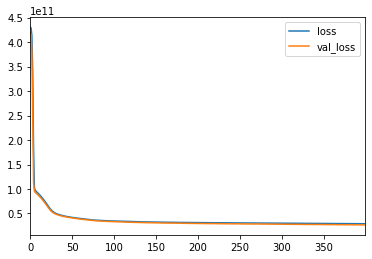

In [63]:
losses.plot()

In [64]:
#If Validation Loss increases, then we are overfitting, above it is running good as the graph slopes downwards

<b>Do Prediction & Metrics Reporting<b/>

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [66]:
predictions =model.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(y_test, predictions))

163355.410706423

In [68]:
mean_absolute_error(y_test, predictions)

100867.06656659915

In [69]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [70]:
5.402966e+05

540296.6

In [71]:
explained_variance_score(y_test, predictions)

0.7987874705820396

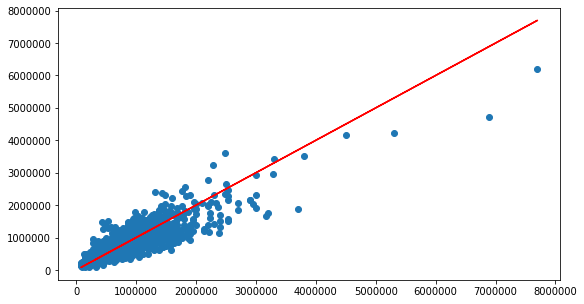

In [72]:
plt.figure(figsize=(9,5))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [73]:
single_house = df.drop('price', axis=1).iloc[0]

In [74]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [75]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [76]:
scaler.transform(single_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [77]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [78]:
model.predict(single_house)

array([[282019.03]], dtype=float32)

In [79]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


<b>From the above prediction, we can see that we are overshooting the target for the full data set. So let's predict for the dataset excluding the top 1%<b/>

In [80]:
bottom99_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<b>Dropping redundant columns<b/>

In [81]:
bottom99_df = bottom99_df.drop('id', axis=1)

In [82]:
bottom99_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [83]:
bottom99_df['date'] = pd.to_datetime(bottom99_df['date'])

In [99]:
bottom99_df['year'] = bottom99_df['date'].apply(lambda date: date.year)
bottom99_df['month'] = bottom99_df['date'].apply(lambda date: date.month)

In [100]:
bottom99_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


In [103]:
bottom99_df = bottom99_df.drop('date', axis=1)
bottom99_df = bottom99_df.drop('zipcode', axis=1)

In [104]:
bottom99_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4


In [105]:
X_new = bottom99_df.drop('price', axis=1).values
y_new = bottom99_df['price'].values
X_new

array([[4.0000e+00, 3.5000e+00, 4.3700e+03, ..., 1.0347e+04, 2.0140e+03,
        6.0000e+00],
       [5.0000e+00, 4.5000e+00, 6.2000e+03, ..., 1.4486e+04, 2.0140e+03,
        1.0000e+01],
       [3.0000e+00, 1.7500e+00, 3.3300e+03, ..., 1.6560e+04, 2.0150e+03,
        2.0000e+00],
       ...,
       [2.0000e+00, 1.0000e+00, 7.3000e+02, ..., 9.0000e+03, 2.0150e+03,
        3.0000e+00],
       [1.0000e+00, 7.5000e-01, 4.3000e+02, ..., 7.5000e+03, 2.0140e+03,
        5.0000e+00],
       [2.0000e+00, 1.0000e+00, 7.8000e+02, ..., 1.0387e+04, 2.0140e+03,
        5.0000e+00]])

In [106]:
y_new

array([1970000., 1960000., 1960000., ...,   81000.,   80000.,   78000.])

<b>Splitting data & Scaling<b/>

In [107]:
scaler2 = MinMaxScaler()

In [108]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=100)

In [109]:
X_train_new.shape

(14966, 19)

In [110]:
X_test_new.shape

(6415, 19)

In [111]:
y_train_new.shape

(14966,)

In [112]:
y_test_new.shape

(6415,)

In [113]:
X_train_new

array([[3.0000e+00, 1.5000e+00, 1.6500e+03, ..., 7.9570e+03, 2.0140e+03,
        6.0000e+00],
       [5.0000e+00, 2.2500e+00, 2.4800e+03, ..., 1.2392e+04, 2.0140e+03,
        1.1000e+01],
       [3.0000e+00, 1.7500e+00, 2.0800e+03, ..., 1.0696e+04, 2.0140e+03,
        1.0000e+01],
       ...,
       [4.0000e+00, 2.5000e+00, 1.1600e+03, ..., 1.2645e+04, 2.0140e+03,
        8.0000e+00],
       [2.0000e+00, 1.0000e+00, 7.6000e+02, ..., 6.3800e+03, 2.0140e+03,
        7.0000e+00],
       [4.0000e+00, 2.5000e+00, 2.0300e+03, ..., 1.0008e+04, 2.0150e+03,
        4.0000e+00]])

In [114]:
X_train_new = scaler2.fit_transform(X_train_new)
X_test_new = scaler2.transform(X_test_new)

In [115]:
X_train_new

array([[0.2       , 0.14285714, 0.17427386, ..., 0.00839241, 0.        ,
        0.45454545],
       [0.4       , 0.25      , 0.28907331, ..., 0.01348689, 0.        ,
        0.90909091],
       [0.2       , 0.17857143, 0.23374827, ..., 0.0115387 , 0.        ,
        0.81818182],
       ...,
       [0.3       , 0.28571429, 0.10650069, ..., 0.01377751, 0.        ,
        0.63636364],
       [0.1       , 0.07142857, 0.05117566, ..., 0.0065809 , 0.        ,
        0.54545455],
       [0.3       , 0.28571429, 0.22683264, ..., 0.01074839, 1.        ,
        0.27272727]])

<b>Creating the Neural Network<b/>

In [116]:
model2 = Sequential()

model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))

model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [117]:
model2.fit(x=X_train_new, y=y_train_new, validation_data=(X_test_new, y_test_new), epochs=400, batch_size=128)

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 1s 55us/sample - loss: 347759544452.7382 - val_loss: 354778357733.1829
Epoch 2/400
14966/14966 [==============================] - 0s 23us/sample - loss: 346627957321.6902 - val_loss: 350753505737.1685
Epoch 3/400
14966/14966 [==============================] - 0s 21us/sample - loss: 330688470528.7526 - val_loss: 313876957054.0645
Epoch 4/400
14966/14966 [==============================] - 0s 22us/sample - loss: 254050668268.6708 - val_loss: 190596311485.9947
Epoch 5/400
14966/14966 [==============================] - 0s 21us/sample - loss: 116099908320.7655 - val_loss: 69177246661.0981
Epoch 6/400
14966/14966 [==============================] - 0s 21us/sample - loss: 56331258834.9785 - val_loss: 55538728231.7868
Epoch 7/400
14966/14966 [==============================] - 0s 22us/sample - loss: 52958712817.3577 - val_loss: 54574243075.3921
Epoch 8/400
14966/14966 [=====================

14966/14966 [==============================] - 0s 22us/sample - loss: 22753307447.7979 - val_loss: 23935079787.7076
Epoch 65/400
14966/14966 [==============================] - 0s 20us/sample - loss: 22705512675.1602 - val_loss: 23855173663.6857
Epoch 66/400
14966/14966 [==============================] - 0s 25us/sample - loss: 22632285655.4259 - val_loss: 23847355772.9472
Epoch 67/400
14966/14966 [==============================] - 0s 22us/sample - loss: 22580603043.6648 - val_loss: 23762201373.5707
Epoch 68/400
14966/14966 [==============================] - 0s 21us/sample - loss: 22549920875.9695 - val_loss: 23708267703.0909
Epoch 69/400
14966/14966 [==============================] - 0s 22us/sample - loss: 22505233115.0180 - val_loss: 23721626622.6432
Epoch 70/400
14966/14966 [==============================] - 0s 21us/sample - loss: 22468353806.6080 - val_loss: 23598207570.2871
Epoch 71/400
14966/14966 [==============================] - 0s 22us/sample - loss: 22425719029.2236 - val_loss

14966/14966 [==============================] - 0s 21us/sample - loss: 21198099317.3775 - val_loss: 22325113749.7690
Epoch 128/400
14966/14966 [==============================] - 0s 21us/sample - loss: 21179391884.5041 - val_loss: 22412364761.6100
Epoch 129/400
14966/14966 [==============================] - 0s 21us/sample - loss: 21179584930.7411 - val_loss: 22426494568.0761
Epoch 130/400
14966/14966 [==============================] - 0s 20us/sample - loss: 21147839406.5781 - val_loss: 22289103072.5138
Epoch 131/400
14966/14966 [==============================] - 0s 21us/sample - loss: 21159847933.5368 - val_loss: 22368696203.4731
Epoch 132/400
14966/14966 [==============================] - 0s 22us/sample - loss: 21139963140.6869 - val_loss: 22279842256.0324
Epoch 133/400
14966/14966 [==============================] - 0s 20us/sample - loss: 21137860423.5349 - val_loss: 22370566135.9389
Epoch 134/400
14966/14966 [==============================] - 0s 22us/sample - loss: 21145626536.2833 - v

14966/14966 [==============================] - 0s 21us/sample - loss: 20746906131.2265 - val_loss: 22055842129.6885
Epoch 191/400
14966/14966 [==============================] - 0s 19us/sample - loss: 20732180270.3557 - val_loss: 21980931885.4535
Epoch 192/400
14966/14966 [==============================] - 0s 19us/sample - loss: 20731033873.9607 - val_loss: 21983291091.1052
Epoch 193/400
14966/14966 [==============================] - 0s 18us/sample - loss: 20731690573.3850 - val_loss: 21977228121.9093
Epoch 194/400
14966/14966 [==============================] - 0s 18us/sample - loss: 20723177838.7406 - val_loss: 21993275755.4681
Epoch 195/400
14966/14966 [==============================] - 0s 19us/sample - loss: 20719361187.1175 - val_loss: 21967942719.3715
Epoch 196/400
14966/14966 [==============================] - 0s 19us/sample - loss: 20726874576.1732 - val_loss: 21959624853.5694
Epoch 197/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20736443202.3349 - v

14966/14966 [==============================] - 0s 23us/sample - loss: 20544584215.3318 - val_loss: 21838665996.8898
Epoch 254/400
14966/14966 [==============================] - 0s 21us/sample - loss: 20573176233.7202 - val_loss: 21856575425.0276
Epoch 255/400
14966/14966 [==============================] - 0s 27us/sample - loss: 20557667353.0424 - val_loss: 21836173795.4270
Epoch 256/400
14966/14966 [==============================] - 0s 30us/sample - loss: 20558007841.0477 - val_loss: 21849564072.5250
Epoch 257/400
14966/14966 [==============================] - 0s 31us/sample - loss: 20556870280.0909 - val_loss: 21905400811.7275
Epoch 258/400
14966/14966 [==============================] - 0s 30us/sample - loss: 20542394273.9885 - val_loss: 21833229141.0407
Epoch 259/400
14966/14966 [==============================] - 0s 30us/sample - loss: 20533099492.0839 - val_loss: 21962992104.4552
Epoch 260/400
14966/14966 [==============================] - 0s 29us/sample - loss: 20553948138.7893 - v

14966/14966 [==============================] - 0s 25us/sample - loss: 20450902339.4981 - val_loss: 21751594452.2625
Epoch 316/400
14966/14966 [==============================] - 0s 25us/sample - loss: 20453051410.4739 - val_loss: 21742543773.9099
Epoch 317/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20453479925.3946 - val_loss: 21746387252.2376
Epoch 318/400
14966/14966 [==============================] - 0s 25us/sample - loss: 20462315326.2296 - val_loss: 21763207749.9161
Epoch 319/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20436714166.6177 - val_loss: 21816342700.1565
Epoch 320/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20459276835.3740 - val_loss: 21734345421.6779
Epoch 321/400
14966/14966 [==============================] - 0s 23us/sample - loss: 20452946426.8684 - val_loss: 21761289250.7186
Epoch 322/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20438060564.1844 - v

14966/14966 [==============================] - 0s 21us/sample - loss: 20346889082.0302 - val_loss: 21678380441.9991
Epoch 379/400
14966/14966 [==============================] - 0s 22us/sample - loss: 20349436493.6587 - val_loss: 21684715169.7010
Epoch 380/400
14966/14966 [==============================] - 0s 18us/sample - loss: 20341501454.4370 - val_loss: 21814141589.0906
Epoch 381/400
14966/14966 [==============================] - 0s 26us/sample - loss: 20347875200.4618 - val_loss: 21718451034.3083
Epoch 382/400
14966/14966 [==============================] - 0s 22us/sample - loss: 20347007371.2041 - val_loss: 21673603875.3970
Epoch 383/400
14966/14966 [==============================] - 0s 22us/sample - loss: 20357254475.2981 - val_loss: 21674934867.1651
Epoch 384/400
14966/14966 [==============================] - 0s 25us/sample - loss: 20333677480.0096 - val_loss: 21688922363.9694
Epoch 385/400
14966/14966 [==============================] - 0s 24us/sample - loss: 20352555613.9431 - v

In [118]:
model2.history.history

{'loss': [347759544452.7382,
  346627957321.69025,
  330688470528.7526,
  254050668268.67087,
  116099908320.76547,
  56331258834.978485,
  52958712817.35774,
  52065675965.45984,
  51143766908.219696,
  50218429567.401306,
  49272215915.73006,
  48312460772.0155,
  47327167246.19752,
  46320266099.7354,
  45294071036.20259,
  44252615784.13791,
  43176164649.634636,
  42096790159.48042,
  40985332733.94735,
  39872498355.60711,
  38761586616.84138,
  37633673171.389015,
  36544289829.631966,
  35464560431.99786,
  34405725213.14767,
  33414883269.97835,
  32465728647.338234,
  31567134279.911266,
  30768645713.764,
  30019171247.125484,
  29345757680.194576,
  28741709710.96726,
  28182281253.631966,
  27676213807.14259,
  27215578452.329815,
  26813692251.035145,
  26446843266.309235,
  26119917235.470264,
  25819122951.69745,
  25559443208.039555,
  25322537410.762527,
  25088196606.35788,
  24900877612.645195,
  24717865394.88868,
  24553562141.558197,
  24399490146.664173,
  24305

<b>Plotting & Checking for losses<b/>

In [120]:
losses2 = pd.DataFrame(model2.history.history)

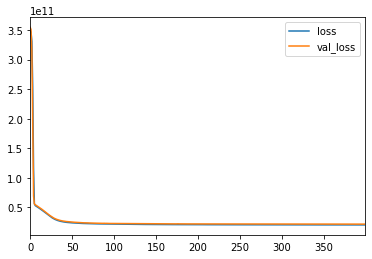

In [122]:
losses2.plot()

In [123]:
model2.predict(X_test_new)

array([[454486.78],
       [629305.8 ],
       [462765.16],
       ...,
       [286693.2 ],
       [607761.3 ],
       [491864.7 ]], dtype=float32)

In [124]:
prediction2 = model2.predict(X_test_new)

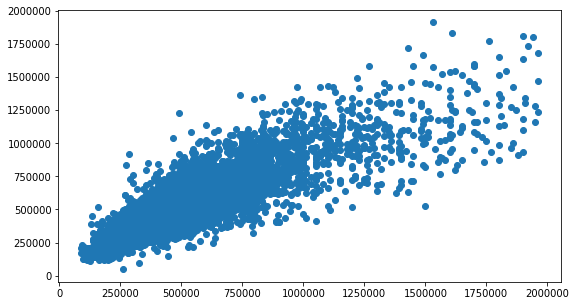

In [130]:
plt.figure(figsize=(9,5))
plt.scatter(y_test_new, prediction2)

In [134]:
explained_variance_score(y_test_new, prediction2)

0.7398101488283642